In [18]:
import base64
import requests
import os
from mistralai import Mistral

def encode_image(image_path):
    """Encode the image to base64."""
    try:
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    except FileNotFoundError:
        print(f"Error: The file {image_path} was not found.")
        return None
    except Exception as e:  # Added general exception handling
        print(f"Error: {e}")
        return None

# Path to your image
image_path = "../data/WhatsApp Image 2024-10-12 à 12.50.36_fd30d4a3.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)

# Retrieve the API key from environment variables
api_key = os.environ["MISTRAL_API_KEY"]

# Specify model
model = "pixtral-12b-2409"

# Initialize the Mistral client
client = Mistral(api_key=api_key)

# Define the messages for the chat
messages = [

    {"role": "system",
     "content": """You are a helpful assistant that enables us to extract brand names using entity identification.
     Only return the brand name and with the type.
     output format must be respected in all calls:
     brand:descriptor
     descriptor is the definition description of the product which specific version of the product.
     """
        },{
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Extract the name of the brand."
            },
            {
                "type": "image_url",
                "image_url": f"data:image/jpeg;base64,{base64_image}" 
            }
        ]
    }
]

# Get the chat response
chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)

Le Pressoir du Pays Basque: Pomme Framboise


In [20]:
import os
import sys
from load_dotenv import load_dotenv

load_dotenv()
%load_ext autoreload
%autoreload 2
sys.path.append("../")


In [22]:
from utils import encode_image

image_path = "../data/WhatsApp Image 2024-10-12 à 12.50.36_fd30d4a3.jpg"
encoded_image = encode_image(image_path=image_path)

[{'role': 'system', 'content': 'You are a helpful assistant that enables us to extract brand names using entity identification.\n     Only return the brand name and with the type.\n     output format must be respected in all calls:\n     brand:descriptor\n     descriptor is the definition description of the product which specific version of the product.\n     '}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Extract the name of the brand.'}, {'type': 'image_url', 'image_url': ''}]}]

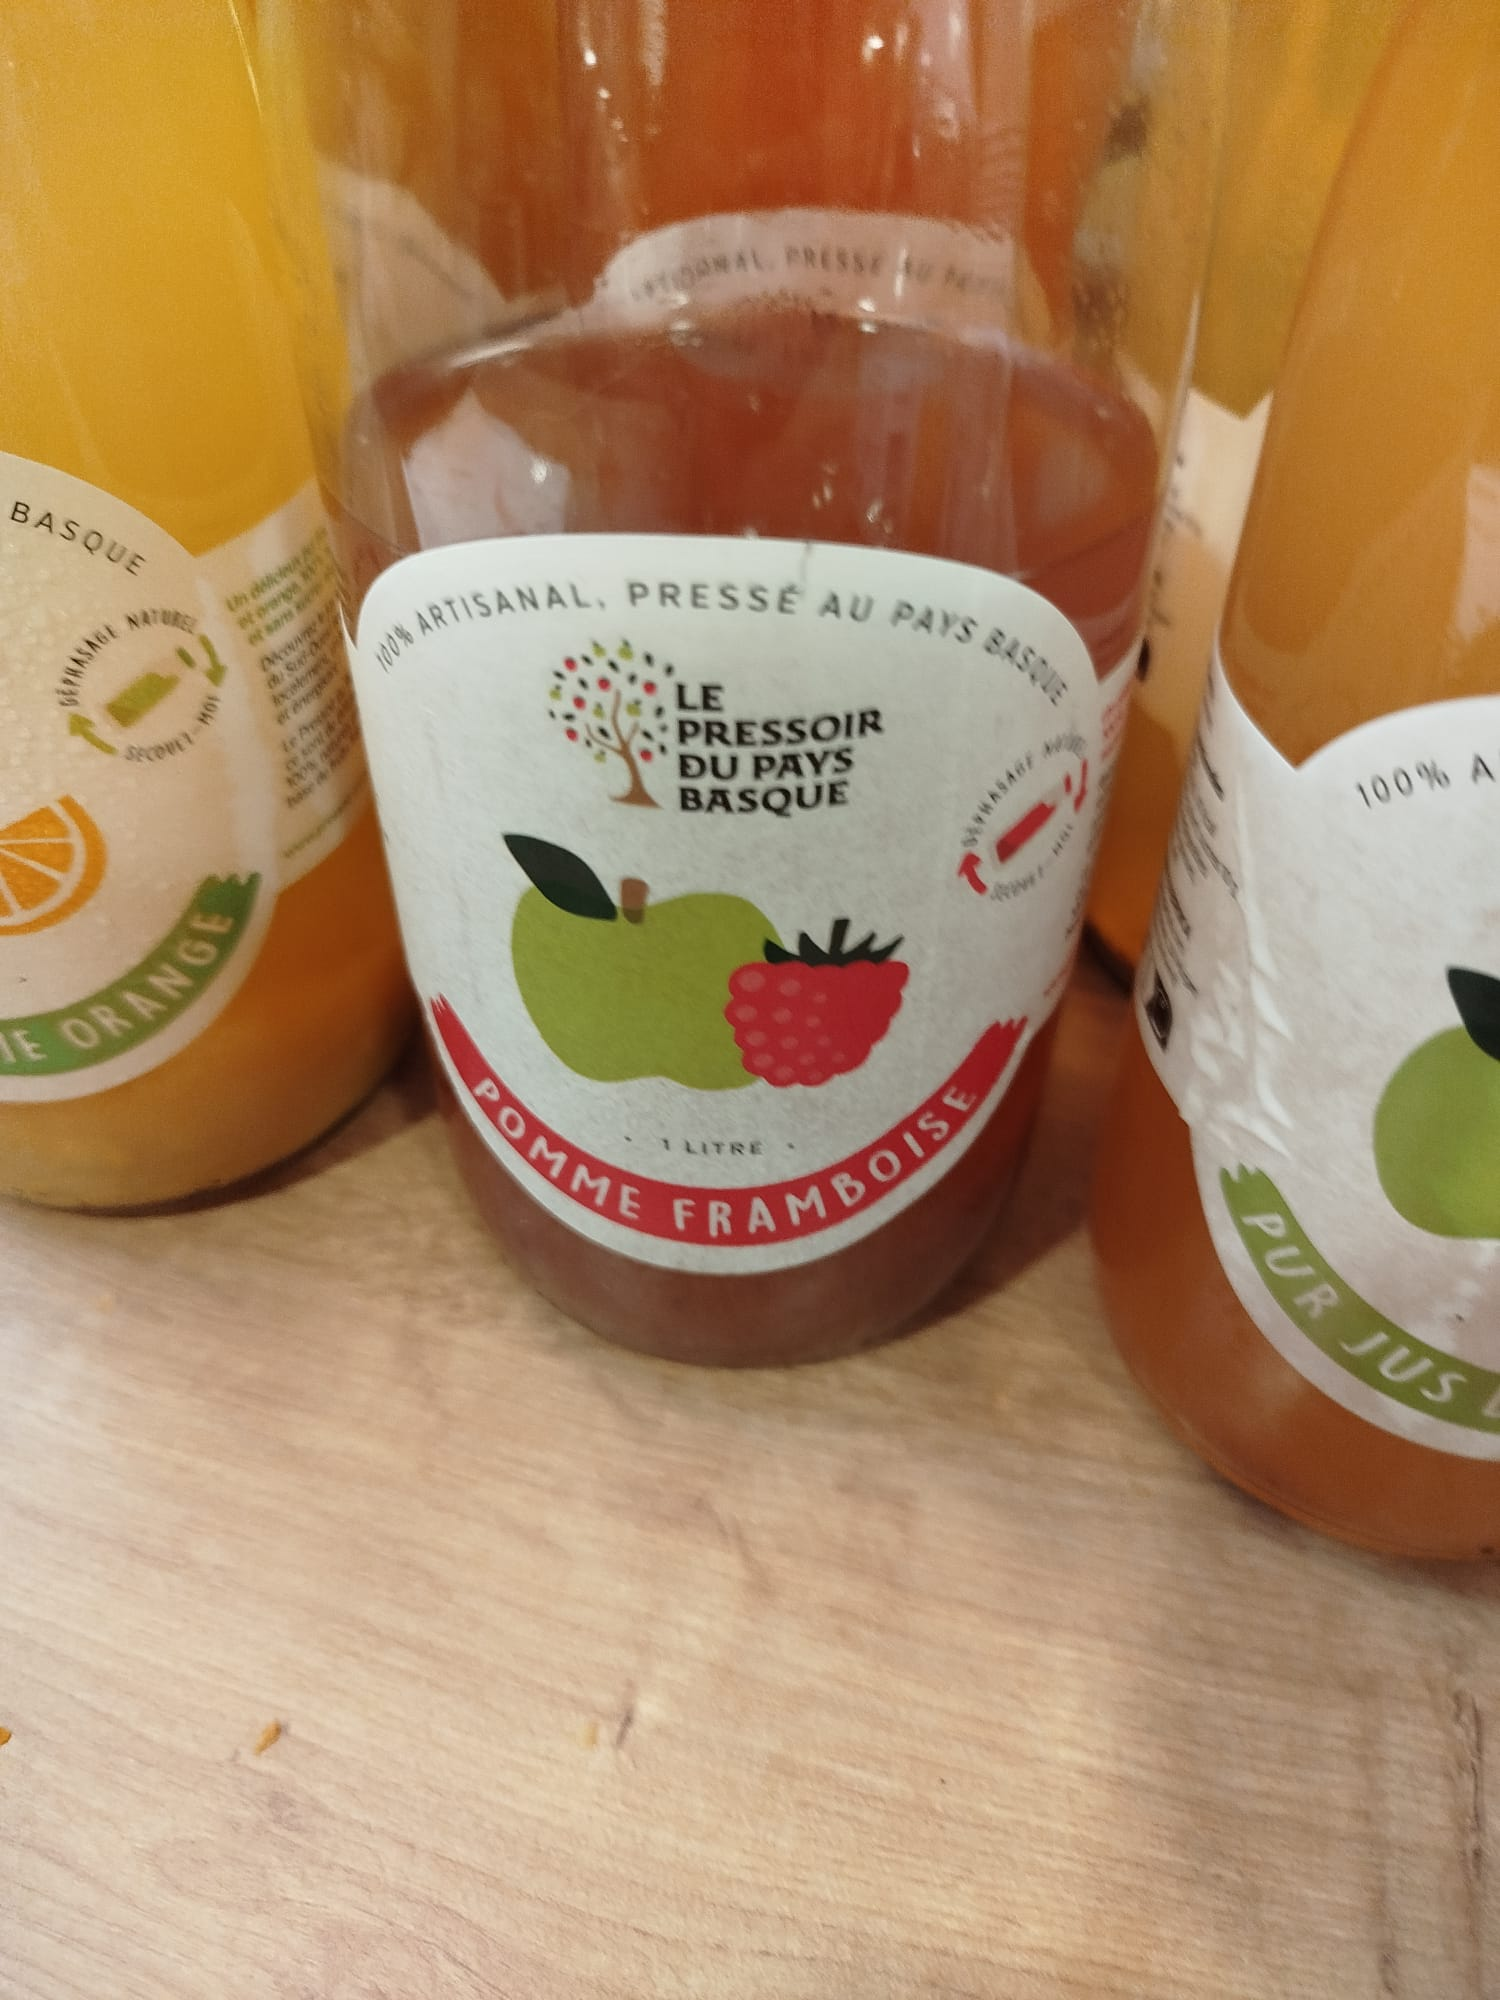

In [32]:
from pipelines.models_api import PROMPTS, mistral_call
from utils import encode_image

image_path = "../data/WhatsApp Image 2024-10-12 à 12.50.36_fd30d4a3.jpg"
encoded_image = encode_image(image_path=image_path)

chat_response, messages = mistral_call(text_input=PROMPTS.user_prompt_detection,
                                       base64_image=encoded_image)

In [33]:
chat_response

'Le pressoir du pays basque: Pomme framboise'

In [35]:
import os

os.listdir("../data/")

['WhatsApp Image 2024-10-12 à 12.50.36_fd30d4a3.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.37_638069ad.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_0305741d.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_2029e056.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_49e745aa.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_8fb6bb02.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_ac367551.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.38_c17eaf96.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_2594beb8.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_45bf90ec.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_55bdbfac.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_74c8e033.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_82fe15fa.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.39_d8dc207e.jpg',
 'WhatsApp Image 2024-10-12 à 12.50.40_23b17632.jpg']

In [9]:
import os
from mistralai import Mistral

# Retrieve the API key from environment variables
api_key = os.environ["MISTRAL_API_KEY"]

# Specify model
model = "pixtral-12b-2409"

# Initialize the Mistral client
client = Mistral(api_key=api_key)

# Define the messages for the chat
messages = [
    {"role": "system", "content": """You are a helpful assistant that enables us to extract brand names using entity identification.
     Only return the brand name with no other extra phrases."""
        },{
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Extract the name of the brand."
            },
            {
                "type": "image_url",
                "image_url": "https://www.myamericanshop.com/cdn/shop/products/lucky-charms-cereals-065633132122-33662691836067.jpg?v=1704732897&width=800"
            }
        ]
    }
]

# Get the chat response
chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)


Lucky Charms


In [ ]:
import os
from mistralai import Mistral

# Retrieve the API key from environment variables
api_key = os.environ["MISTRAL_API_KEY"]

# Specify model
model = "pixtral-12b-2409"

# Initialize the Mistral client
client = Mistral(api_key=api_key)

# Define the messages for the chat
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "What's in this image?"
            },
            {
                "type": "image_url",
                "image_url": "https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg"
            }
        ]
    }
]

# Get the chat response
chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)
